## <u>**Use the "Text" blocks to provide explanations wherever you find them necessary. Highlight your answers inside these text fields to ensure that we don't miss it while grading your HW.**</u> 

## **Setup**

- Code to download the data directly from the colab notebook.
- If you find it easier to download the data from the kaggle website (and uploading it to your drive), you can skip this section.

In [35]:
# First mount your drive before running these cells. 
# Create a folder for the this HW and change to that dir
%cd drive/MyDrive/CSE\ 519\ fall\ 2021/HW3

[Errno 2] No such file or directory: 'drive/MyDrive/CSE 519 fall 2021/HW3'
/content/drive/MyDrive/CSE 519 fall 2021/HW3


In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install -q kaggle

In [4]:
from google.colab import files
# Create a new API token under "Account" in the kaggle webpage and download the json file
# Upload the file by clicking on the browse 
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"nileshrustagi","key":"5423e8f31c1c551d8d561b96f6705b94"}'}

In [3]:
import os
os.environ["KAGGLE_USERNAME"] = "nileshrustagi"
os.environ["KAGGLE_KEY"] = "5423e8f31c1c551d8d561b96f6705b94"

In [97]:
%cp kaggle.json /root/.kaggle/

In [7]:
!kaggle competitions download -c  rossmann-store-sales

store.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
%ls

'kaggle (1).json'   sample_submission.csv   test.csv.zip   train.csv.zip
 kaggle.json        store.csv               train.csv


In [ ]:
!unzip  train.csv.zip

Archive:  train.csv.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## **Section 1: Library and Data Imports (Q1)**

- Import your libraries and read the data into a dataframe. Print the head of the dataframe. 

In [47]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from collections import defaultdict

In [48]:
df_store = pd.read_csv('store.csv')

In [49]:
#fill in dtypes dict for efficient memory utilization
dtypes = {'StateHoliday': str}
parse_dates = ['Date']
df_train = pd.read_csv('train.csv',dtype=dtypes,parse_dates=parse_dates)

In [50]:
df = pd.merge(df_train,df_store,on="Store")

In [51]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [52]:
df.isna().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

In [53]:
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Day'] = pd.DatetimeIndex(df['Date']).day
df['WeekOfYear'] = pd.DatetimeIndex(df['Date']).weekofyear

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  after removing the cwd from sys.path.


In [54]:
#Label Encoding the StateHoliday column
df.loc[df['StateHoliday'] == '0', 'StateHoliday'] = 0
df.loc[df['StateHoliday'] == 'a', 'StateHoliday'] = 1 #Public Holiday
df.loc[df['StateHoliday'] == 'b', 'StateHoliday'] = 2 #Easter 
df.loc[df['StateHoliday'] == 'c', 'StateHoliday'] = 3 #Christmas

df['StateHoliday'] = df['StateHoliday'].astype(int)

## **Section 2: Effect of Holidays (Q2)**

##Effect of Sales before and on Christmas

In [13]:
#EFFECT OF CHRISTMAS
df_december = df[df['Month'] == 12]
df_december = df_december.groupby(['Day','Year']).agg({'Sales' : 'median'}).reset_index()
df_december['Percentage_sales'] = 0.0

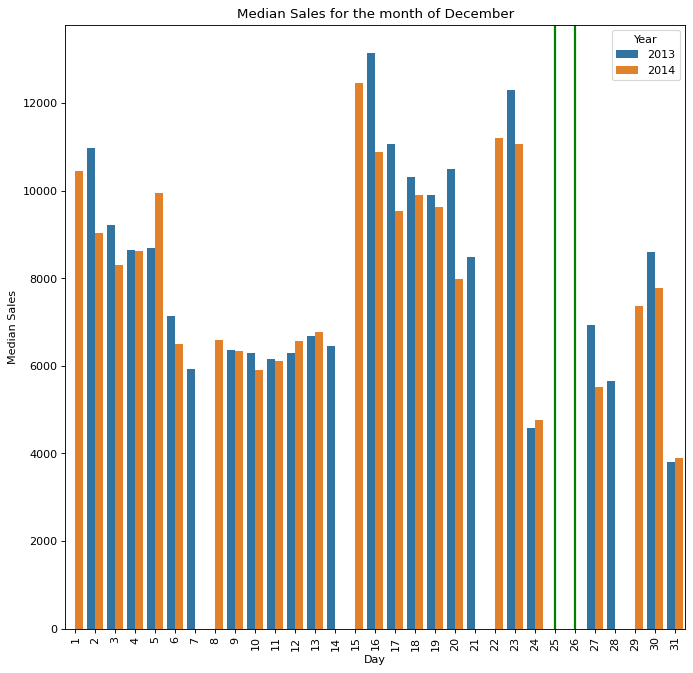

In [14]:
from matplotlib.pyplot import figure

figure(figsize=(10, 10), dpi=80)
sns.barplot(x='Day', y='Sales', hue='Year', data=df_december)
plt.xticks(rotation = 90)
plt.title("Median Sales for the month of December")
plt.xlabel("Day")
plt.ylabel("Median Sales")
plt.axvline(x=24,linewidth=2,color='g')
plt.axvline(x=25,linewidth=2,color='g')

From the above graph, it can be clearly inferred that the median sales on the days leading upto Christmas i.e according to dataset is on 25th and 26th is much higher as compared to sales on the Christmas. This is due to the fact that most stores remain closed on holidays and thus have no sales.

PS: The green line indicates Christmas holiday

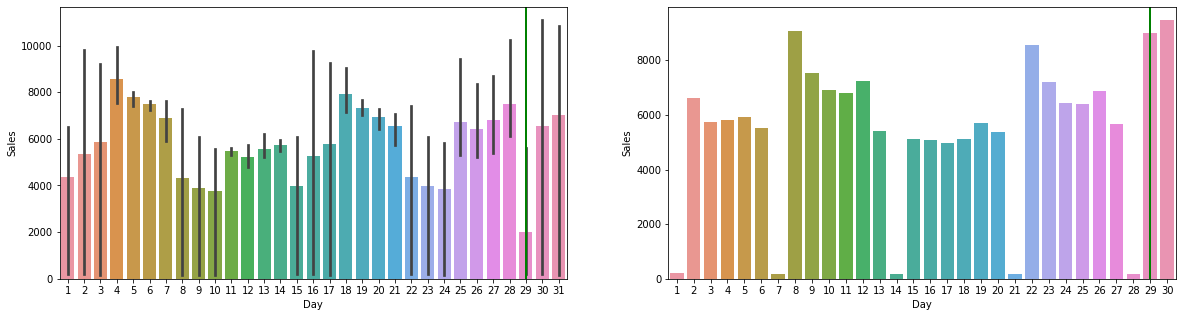

In [15]:
x1 = df[(df['Month'] == 3)]
x2 = x1.groupby(['Day','Year']).agg({'Sales':'mean'}).reset_index()

x3 = df[(df['Month'] == 4) & (df['Year'] == 2013)]
x4 = x3.groupby(['Day','Year']).agg({'Sales':'mean'}).reset_index() 

fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharex=False)

sns.barplot(ax=axes[0],x='Day',y='Sales',data=x2)
sns.barplot(ax=axes[1],x='Day',y='Sales',data=x4)

axes[0].axvline(x=28,linewidth=2,color='g')
axes[1].axvline(x=28,linewidth=2,color='g')

##Effect of School Holidays

Text(0.5, 1.0, 'School Holidays vs Mean Sales')

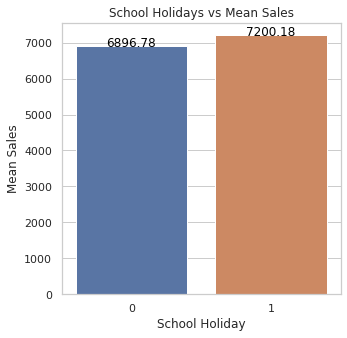

In [39]:
school_holiday = df[df['Open'] == 1]
school_holiday = school_holiday.groupby(['SchoolHoliday']).agg({'Sales':'mean'}).reset_index()
school_holiday['Sales']
plt.rcParams["figure.figsize"] = (5,5)
g = sns.barplot(x='SchoolHoliday', y='Sales', data=school_holiday)

for index, row in school_holiday.iterrows():
    g.text(row.SchoolHoliday,row.Sales, round(row.Sales,2), color='black', ha="center")

plt.xlabel("School Holiday")
plt.ylabel("Mean Sales")
plt.title("School Holidays vs Mean Sales")

Text(0.5, 1.0, 'School Holidays vs Mean Sales')

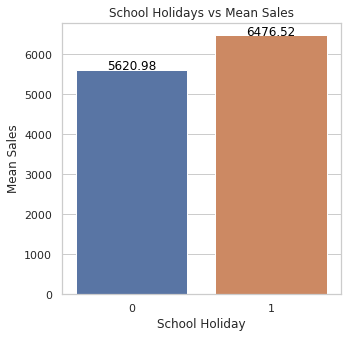

In [52]:
#EFFECT OF SCHOOL HOLIDAY

school_holiday = df.groupby(['SchoolHoliday']).agg({'Sales':'mean'}).reset_index()
plt.rcParams["figure.figsize"] = (5,5)
g = sns.barplot(x='SchoolHoliday', y='Sales', data=school_holiday)

for index, row in school_holiday.iterrows():
    g.text(row.SchoolHoliday,row.Sales, round(row.Sales,2), color='black', ha="center")

plt.xlabel("School Holiday")
plt.ylabel("Mean Sales")
plt.title("School Holidays vs Mean Sales")

The above bar plot reflects the average sales when there is school holiday and when there is not a school holiday. It can be inferred that school holiday doesn't have a pronounced effect on average sales.

##Effect of State Holidays

[Text(0, 0.5, 'Avg Sales'),
 Text(0.5, 0, 'StateHoliday'),
 Text(0.5, 1.0, 'Avg Sales vs StateHolidays for Open Stores')]

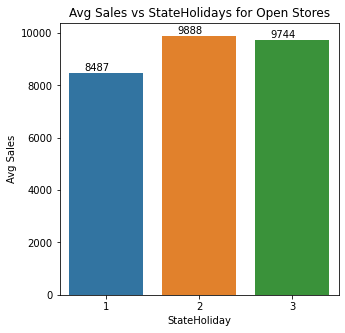

In [17]:
df_holiday_overall = df[(df['StateHoliday'] != 0) & (df['Open'] == 1)]
df_holiday_overall = df_holiday_overall.groupby(['StateHoliday']).agg({'Sales':'mean'}).reset_index()

plt.rcParams["figure.figsize"] = (5,5)
p1 = sns.barplot( x = 'StateHoliday', y = 'Sales', data = df_holiday_overall)
for p in p1.patches:
        p1.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
p1.set(xlabel="StateHoliday", ylabel="Avg Sales", title="Avg Sales vs StateHolidays for Open Stores")

Although the cumulative sales on public holidays for stores which remain open on those days are higher than the cumulative sales on Christmas and Easter, but the avg sales of open stores on Christmas and Easter is comparatively higher.

[Text(0, 0.5, 'Avg Sales'),
 Text(0.5, 0, 'StateHoliday'),
 Text(0.5, 1.0, 'Avg Sales vs Non-StateHolidays and StateHolidays for Open Stores')]

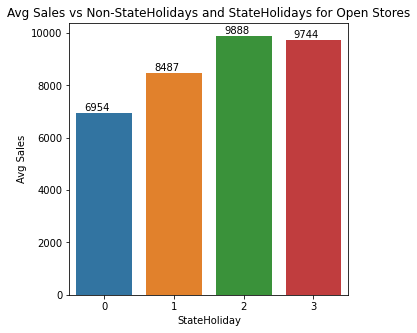

In [18]:
df_overall = df[df['Open'] == 1]
df_overall = df_overall.groupby(['StateHoliday']).agg({'Sales':'mean'}).reset_index()
p2 = sns.barplot( x = 'StateHoliday', y = 'Sales', data = df_overall)

for p in p2.patches:
        p2.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
p2.set(xlabel="StateHoliday", ylabel="Avg Sales", title="Avg Sales vs Non-StateHolidays and StateHolidays for Open Stores")

Another interesting point that was noticed was that even though the number of non-StateHolidays are in majority, the average sales of open stores on holidays and non-holidays for public, Easter and Christmas is much higher. 

## **Section 3: Most and Least selling stores (Q3a & Q3b)**

In [55]:
from collections import defaultdict
mydata = {}
for i in range(len(df)):
  store = df.loc[i,"Store"] 
  month = df.loc[i,"Month"]
  year = df.loc[i,"Year"]
  sales = df.loc[i,"Sales"]

  if store not in mydata:
    mydata[store] = defaultdict(int)
  mydata[store][(month,year)] += sales

In [56]:
import operator
#All stores have atleast 6 months of data across the 3 years i.e 2013,2014,2015
store_sale = defaultdict(int)
for k in mydata.keys():
  store_sale[k] = sum(mydata[k].values())

sorted_store_sale = dict(sorted(store_sale.items(), key=operator.itemgetter(1),reverse=True))
print("Stores with maximum cumulative sales")
print(list(sorted_store_sale.keys())[:5])

print("Stores with minimum cumulative sales")
print(list(sorted_store_sale.keys())[len(sorted_store_sale)-5:])

Stores with maximum cumulative sales
[262, 817, 562, 1114, 251]
Stores with minimum cumulative sales
[263, 208, 198, 543, 307]


##3A

     Store       Date         Sales
0      251 2013-01-06  12186.166667
1      251 2013-01-13  17979.142857
2      251 2013-01-20  14158.571429
3      251 2013-01-27  15799.857143
4      251 2013-02-03  14837.571429
..     ...        ...           ...
670   1114 2015-07-05  21811.571429
671   1114 2015-07-12  18040.428571
672   1114 2015-07-19  21307.000000
673   1114 2015-07-26  18132.428571
674   1114 2015-08-02  25996.200000

[675 rows x 3 columns]
     Store       Date        Sales
0      198 2013-01-06  1258.833333
1      198 2013-01-13  3607.142857
2      198 2013-01-20  1506.285714
3      198 2013-01-27  3223.857143
4      198 2013-02-03  1574.285714
..     ...        ...          ...
645    543 2015-07-05  3001.857143
646    543 2015-07-12  1696.000000
647    543 2015-07-19  2788.285714
648    543 2015-07-26  1591.285714
649    543 2015-08-02  3675.800000

[650 rows x 3 columns]


[Text(0, 0.5, 'Sales'),
 Text(0.5, 0, 'Date'),
 Text(0.5, 1.0, 'Mean Sales weekly over time for top 5 selling stores')]

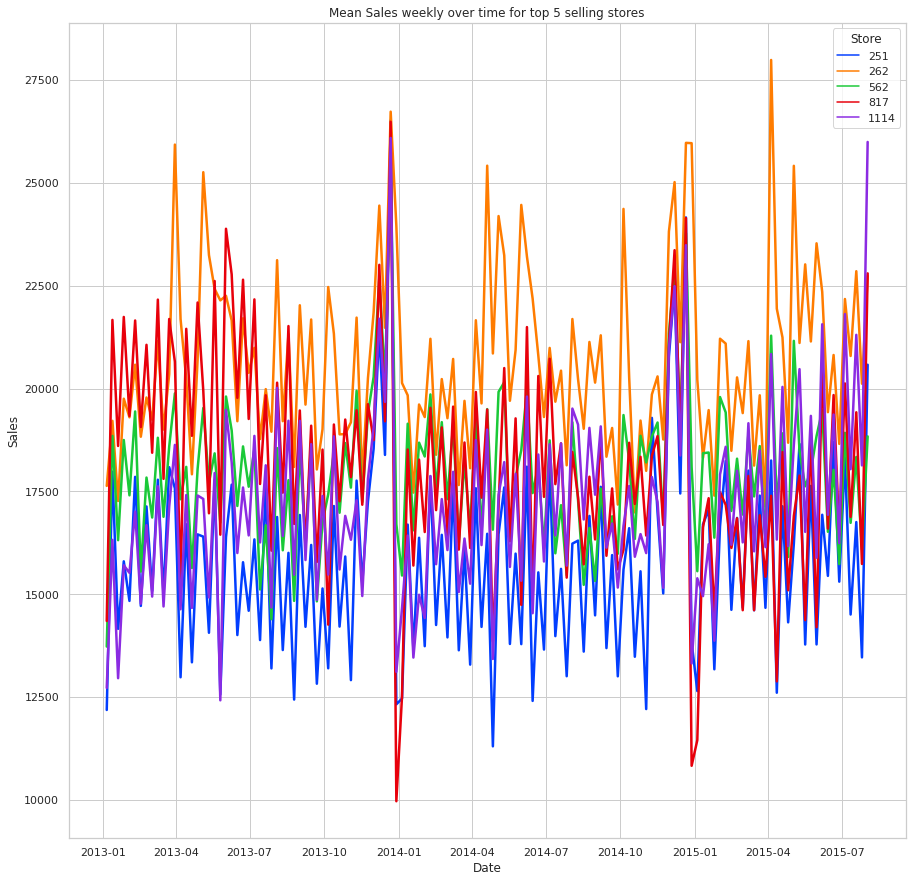

In [71]:
df_max_sales_top_5 = df[df['Store'].isin(list(sorted_store_sale.keys())[:5])]
df_max_sales_top_5 = df_max_sales_top_5.reset_index()
top_5_sale_data = df_max_sales_top_5.groupby(['Store','Date']).agg({'Sales' : 'sum'}).reset_index().sort_values(by='Date')
top_5_weekly_data = top_5_sale_data.groupby(['Store', pd.Grouper(freq='1W', key='Date')]).agg({'Sales' : 'mean'}).reset_index()
#top_5_weekly_data = df_max_sales_top_5.groupby(['Store', 'WeekOfYear']).agg({'Sales' : 'mean'}).reset_index()

print(top_5_weekly_data)

df_max_sales_least_5 =  df[df['Store'].isin(list(sorted_store_sale.keys())[len(sorted_store_sale)-5:])]
df_max_sales_least_5 = df_max_sales_least_5.reset_index()
least_5_sale_data = df_max_sales_least_5.groupby(['Store','Date']).agg({'Sales' : 'sum'}).reset_index().sort_values(by='Date')
least_5_weekly_data = least_5_sale_data.groupby(['Store', pd.Grouper(freq='1W', key='Date')]).agg({'Sales' : 'mean'}).reset_index()
#least_5_weekly_data = df_max_sales_least_5.groupby(['Store', 'WeekOfYear']).agg({'Sales' : 'mean'}).reset_index()
least_5_weekly_data = least_5_weekly_data.sort_values(by=['Store','Date'])


print(least_5_weekly_data)
plt.rcParams["figure.figsize"] = (15,15)
g1 = sns.lineplot(x = "Date", y = "Sales", hue = "Store", data = top_5_weekly_data, palette=sns.color_palette('bright', n_colors=5), linewidth=2.5)
g1.set(xlabel='Date', ylabel='Sales', title='Mean Sales weekly over time for top 5 selling stores')

[Text(0, 0.5, 'Sales'),
 Text(0.5, 0, 'Date'),
 Text(0.5, 1.0, 'Mean Sales weekly over time for least 5 selling stores')]

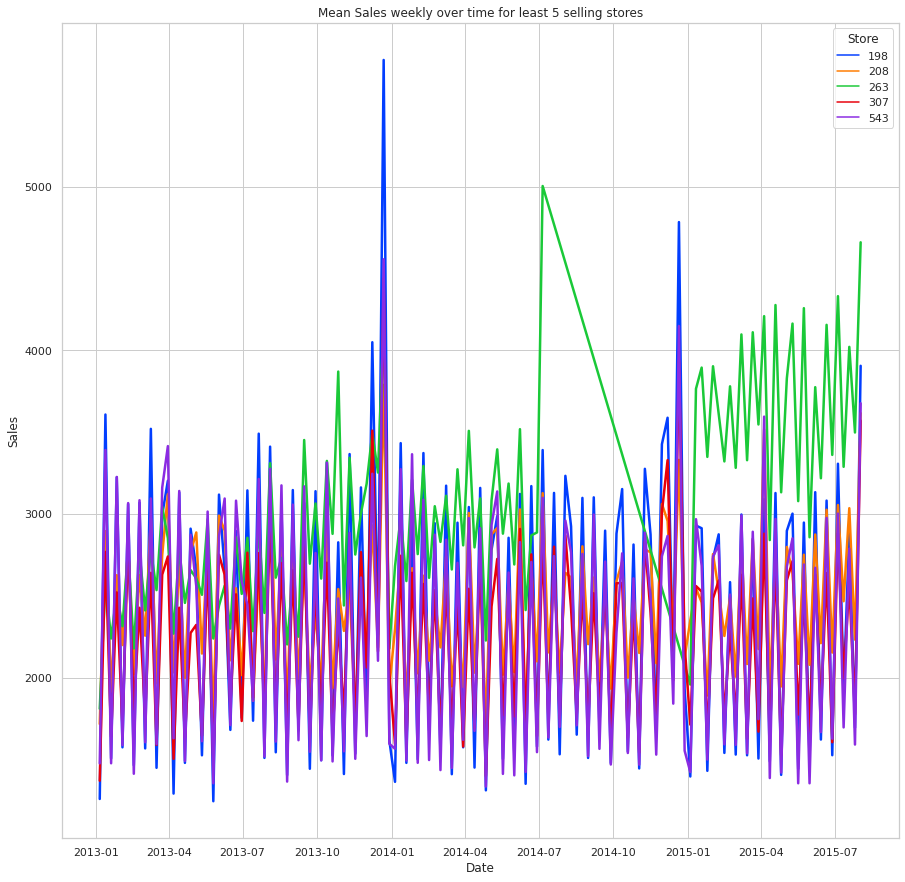

In [74]:
plt.rcParams["figure.figsize"] = (15,15)
g2 = sns.lineplot(x = "Date", y = "Sales", hue = "Store", data = least_5_weekly_data, palette=sns.color_palette('bright', n_colors=5), linewidth=2.5)
g2.set(xlabel='Date', ylabel='Sales', title='Mean Sales weekly over time for least 5 selling stores')

##3B

In [76]:
df_max_sales_top_5 = df[df['Store'].isin(list(sorted_store_sale.keys())[:5])]
df_max_sales_top_5 = df_max_sales_top_5.reset_index()
#top_5_sale_data = df_max_sales_top_5.groupby(['Store','Date']).agg({'Sales' : 'sum'}).reset_index().sort_values(by='Date')
#top_5_weekly_data = top_5_sale_data.groupby(['Store', pd.Grouper(freq='1W', key='Date')]).agg({'Sales' : 'mean'}).reset_index()
top_5_weekly_data = df_max_sales_top_5.groupby(['Store', 'WeekOfYear']).agg({'Sales' : 'mean'}).reset_index()

print(top_5_weekly_data)

df_max_sales_least_5 =  df[df['Store'].isin(list(sorted_store_sale.keys())[len(sorted_store_sale)-5:])]
df_max_sales_least_5 = df_max_sales_least_5.reset_index()
#least_5_sale_data = df_max_sales_least_5.groupby(['Store','Date']).agg({'Sales' : 'sum'}).reset_index().sort_values(by='Date')
#least_5_weekly_data = least_5_sale_data.groupby(['Store', pd.Grouper(freq='1W', key='Date')]).agg({'Sales' : 'mean'}).reset_index()
least_5_weekly_data = df_max_sales_least_5.groupby(['Store', 'WeekOfYear']).agg({'Sales' : 'mean'}).reset_index()

print(least_5_weekly_data)


     Store  WeekOfYear         Sales
0      251           1  12444.000000
1      251           2  17123.761905
2      251           3  14956.523810
3      251           4  15116.047619
4      251           5  15073.809524
..     ...         ...           ...
255   1114          48  20022.857143
256   1114          49  22094.428571
257   1114          50  19025.285714
258   1114          51  24789.642857
259   1114          52  13215.071429

[260 rows x 3 columns]
     Store  WeekOfYear        Sales
0      198           1  1343.550000
1      198           2  3322.904762
2      198           3  1966.000000
3      198           4  2537.952381
4      198           5  1933.714286
..     ...         ...          ...
255    543          48  2192.214286
256    543          49  3055.642857
257    543          50  1972.142857
258    543          51  4351.571429
259    543          52  1574.785714

[260 rows x 3 columns]


In [77]:
sns.set_theme(style="whitegrid")

[Text(0, 0.5, 'Sales'),
 Text(0.5, 0, 'Week of year'),
 Text(0.5, 1.0, 'Avg Sales vs week of year for least 5 selling stores')]

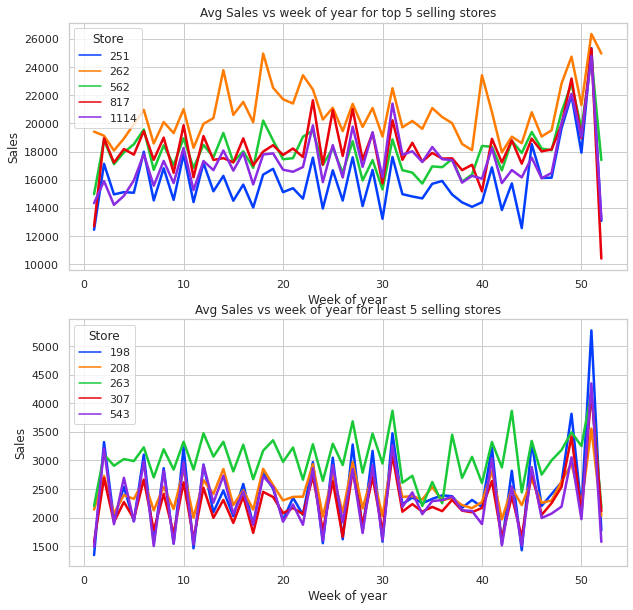

In [78]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharex=False)

sns.lineplot(ax=axes[0],x = "WeekOfYear", y = "Sales", hue = "Store", data = top_5_weekly_data, palette=sns.color_palette('bright', n_colors=5), linewidth=2.5)
plt.xlabel("Week of the year")
plt.ylabel("Sales")

sns.lineplot(ax=axes[1],x = "WeekOfYear", y = "Sales", hue = "Store", data = least_5_weekly_data, palette=sns.color_palette('bright', n_colors=5), linewidth=2.5)
plt.xlabel("Week of the year")
plt.ylabel("Sales")

axes[0].set(xlabel='Week of year',ylabel='Sales',title='Avg Sales vs week of year for top 5 selling stores')
axes[1].set(xlabel='Week of year',ylabel='Sales',title='Avg Sales vs week of year for least 5 selling stores')

From the 2 lineplots it can be inferred that the avg sales for a week of a year across the 3 years i.e 2013,2014,2015 increases during the week 50-52 majorly because of Christmas. Also, during weeks 22-30, we see a similar pattern in sales that it is kind of a see-saw pattern with sales increasing every alternate week. 

## **Section 4: Closest Competitor: Distance and Age (Q4a & Q4b)**

Text(0.5, 1.0, 'Competition Distance vs Mean Sales per Week')

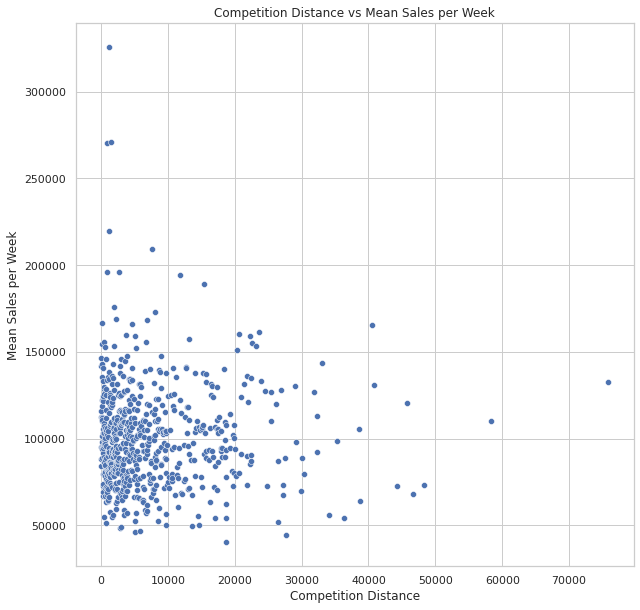

In [93]:
df_competitor = df.groupby(['Store', 'CompetitionDistance', 'WeekOfYear']).agg({'Sales' : 'sum'}).reset_index()

df_competitor = df_competitor.sort_values(by=["CompetitionDistance","WeekOfYear"], ascending=[False,True]).reset_index()

df_competitor = df_competitor.groupby(['CompetitionDistance']).agg({'Sales':'mean'}).reset_index()
plt.rcParams["figure.figsize"] = (10,10)
sns.scatterplot(x='CompetitionDistance', y='Sales',data=df_competitor)
plt.xlabel("Competition Distance")
plt.ylabel("Mean Sales per Week")
plt.title("Competition Distance vs Mean Sales per Week")

From the above graph it can be inferred that store CompetitionDistance  doesn't have a pronounced effect on the mean weekly sales. Although, we do observe that the weekly sales for store having nearby competitor store is really high i.e above 150000, it is difficult to tell whether that it is entirely due to competition distance. Most stores have competition store nearby, so the data is skewed.

## **Section 5: Pearson Correlation of Features (Q5)**

##Pearson Correlation

In [82]:
#Pearson Correlation
cols = ['StateHoliday','Promo','CompetitionDistance','Open','Sales']
corr_df = df[cols]
corr_df['CompetitionDistance'].fillna(int(df['CompetitionDistance'].median()), inplace=True)

corr_test = corr_df.corr(method='pearson')


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


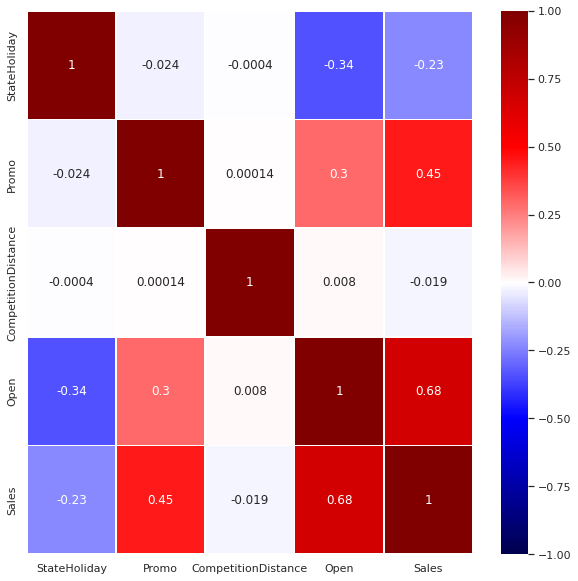

In [83]:
plt.rcParams["figure.figsize"] = (10,10)
sns.heatmap(corr_test, vmin=-1, vmax=1, cmap='seismic', linewidths=0.8, annot=True)

##Spearman Correlation

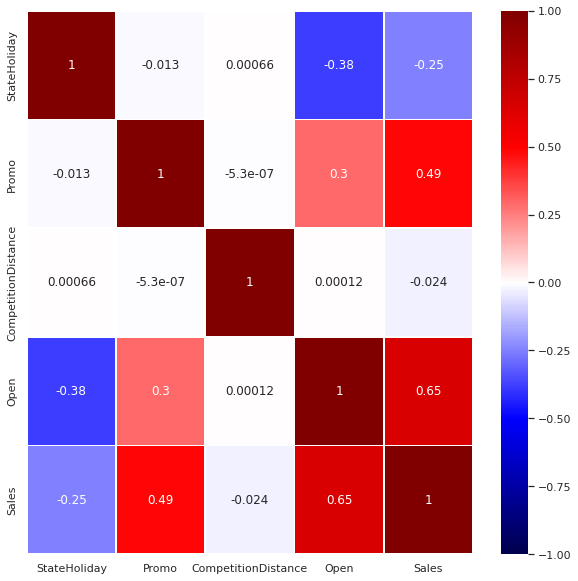

In [84]:
sns.heatmap(corr_df.corr(method='spearman'), vmin=-1, vmax=1, cmap='seismic', linewidths=0.8, annot=True)

The features selected are Promo, Open, CompetitionDistance, Sales, StateHoliday.

The feature pairs with highest correlation are (Sales,Open), (Sales,Promo) and (Promo,Open).

The features higly correlating to sales are Open and Promo.

The Spearman coefficient for Open vs Sales is 0.05 higher than Pearson coefficient indicating that the relationship between Promo and Sales is monotonic but not linear. On the other hand, the pearson coefficient for (Open,Sales) is higher than the Spearman coefficient which likely indicates that the relationship is more linear than monotonic

## **Section 6: Permutation Testing (Q6)**

In [101]:
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold, permutation_test_score


df1 = df[df["Sales"] != 0]

vals = ['Store','Promo','Customers']
for val in vals:
  x = df1[[val]].values
  y = np.log(df1['Sales'].values)
  reg = LinearRegression()
  cv = StratifiedKFold(2,shuffle=True,random_state=0)
  score, perm_test, pval  = permutation_test_score(reg,x,y,scoring="neg_root_mean_squared_error",cv=2,n_permutations=500)
  print(pval)

1.0
0.001996007984031936
0.001996007984031936


PS: Excluded the rows when Sales are 0.

The pvalue for 'Store' is 1.0 indicating that the the feature is insignificant and thus the null hypothesis i.e 'Store' feature is not statistically significant holds true and thus doesn't affect sales

For features 'Promo' and 'Customers', we see that the pvalue is ~0.0012, indicating that we can reject the null hypothesis and that these features are somewhat significant and thus affect sales.

## **Section 7: Interesting findings (Q7)**

##Plot 1

Text(0.5, 1.0, 'Competition Distance vs % of total Customers')

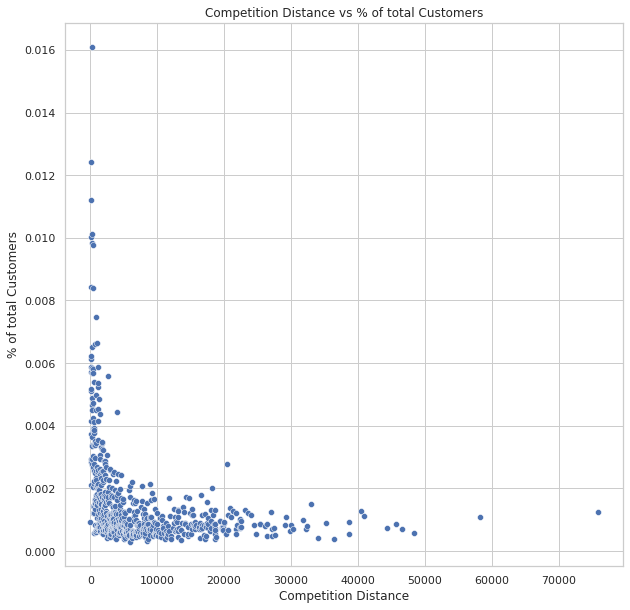

In [110]:
#CompetitionDistance vs %of total customers
plt.rcParams["figure.figsize"] = (10,10)
cust_competition = df.groupby('CompetitionDistance').agg({'Customers':'sum'}).reset_index()

total_cust = sum(cust_competition['Customers'])
cust_competition['Percentage'] = cust_competition['Customers']/total_cust

sns.set_theme(style="whitegrid")
sns.scatterplot(x='CompetitionDistance',y='Percentage',data=cust_competition)
plt.xlabel("Competition Distance")
plt.ylabel("% of total Customers")
plt.title("Competition Distance vs % of total Customers")

We see that the percentage of total customers flocking/visiting the stores when there is a nearby competitor store or when there is no nearby competitor is more when the competitor is far away

##Plot 2

Text(0, 0.5, 'Mean Sales')

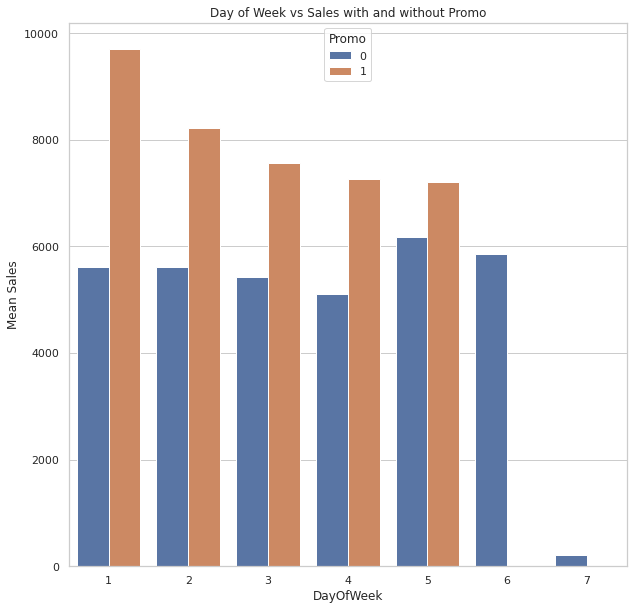

In [111]:
promo_day_of_week = df.groupby(['Promo','DayOfWeek']).agg({'Sales':'mean'}).reset_index()
sns.barplot(x='DayOfWeek',y='Sales',hue='Promo',data=promo_day_of_week)
plt.title("Day of Week vs Sales with and without Promo")
plt.ylabel("Mean Sales")

Interesting thing about this plot is firstly that, there are no promos offered during weekends i.e Saturday and Sunday. Secondly, as expected, mean sales when there is promo on a weekday is more than sales without promo. Thirdly, it can be inferred that the Monday is the best day for promos as average sales are highest on that day. 

##Plot 3

[Text(0, 0.5, 'Avg Customers'),
 Text(0.5, 0, 'Assortment'),
 Text(0.5, 1.0, 'Assortment vs Average Customers')]

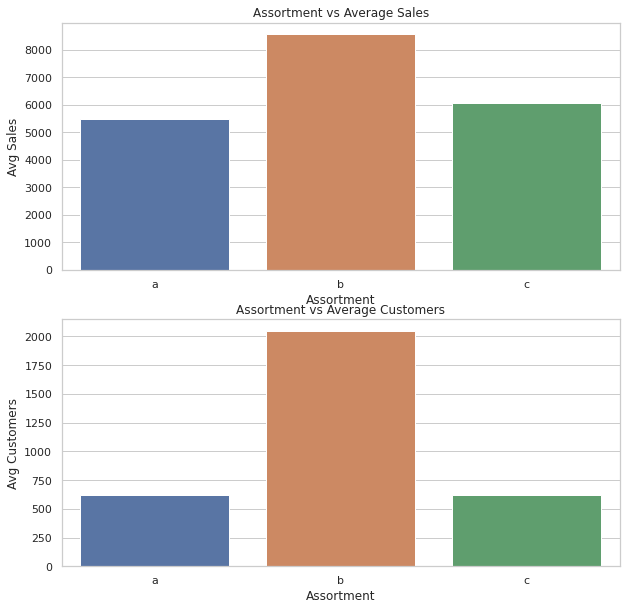

In [112]:
#Assortment vs Customers, Sales
df_store_type = df.groupby('Assortment').agg({'Customers':'mean','Sales':'mean'}).reset_index()
plt.rcParams["figure.figsize"] = (10,10)
fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharex=False)
sns.barplot(ax=axes[0], x=df_store_type.Assortment, y=df_store_type.Sales)
sns.barplot(ax=axes[1], x=df_store_type.Assortment, y=df_store_type.Customers)

axes[0].set(xlabel="Assortment", ylabel="Avg Sales", title="Assortment vs Average Sales")
axes[1].set(xlabel="Assortment", ylabel="Avg Customers", title="Assortment vs Average Customers")

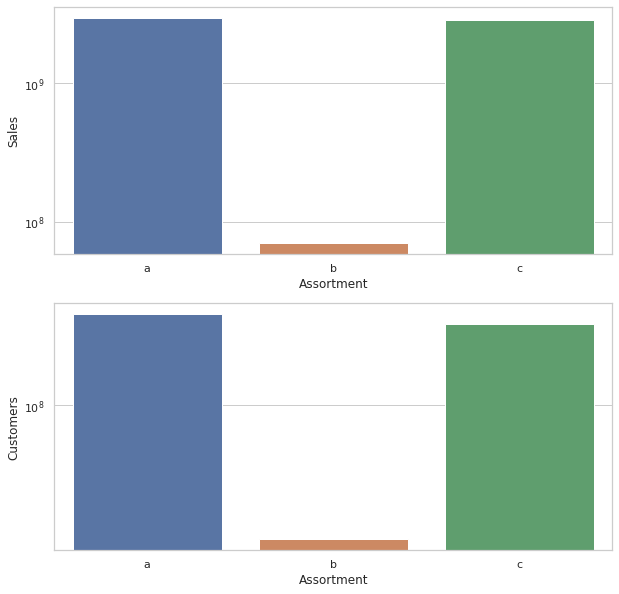

In [113]:
df_store_type = df.groupby('Assortment').agg({'Customers':'sum','Sales':'sum'}).reset_index()
fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharex=False)
sns.barplot(ax=axes[0], x=df_store_type.Assortment, y=df_store_type.Sales)
axes[0].set_yscale('log')
sns.barplot(ax=axes[1], x=df_store_type.Assortment, y=df_store_type.Customers)
axes[1].set_yscale('log')

From the above 4 graphs, we can see that extra assortment type stores have the least sales and customers but the average sales and customers are highest. 

##Plot 4

Text(0.5, 1.0, 'Promo vs Weekly Sales')

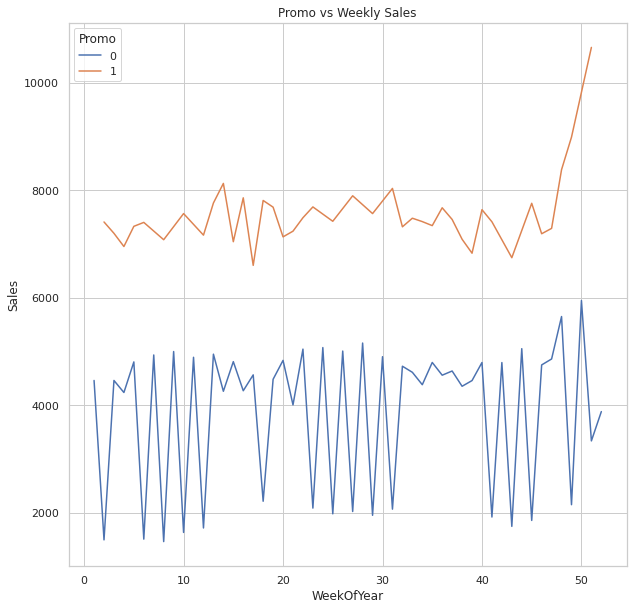

In [114]:
plt.rcParams["figure.figsize"] = (10,10)
df_sale = df.groupby(['Promo','WeekOfYear']).agg({'Sales':'median'}).reset_index()
plot = sns.lineplot(x=df_sale.WeekOfYear,y=df_sale.Sales,hue=df_sale.Promo,markers=True)
plt.title("Promo vs Weekly Sales")

It is interesting to find the effect that Promo have on sales. This graph gives an indication that the weekly sales increase approx 2 folds when there is a promo as compared to normal days. Also during weeks leading upto Christmas, we see a shoot in the sales when there is Promo. Thus promo is highly correlated to sales

In [116]:
df_sale = df[(df['Open'] == 1) & (df['Year'] == 2014)].groupby(['Promo',pd.Grouper(freq='1M',key='Date')]).agg({'Sales':'sum'}).reset_index()
print(df_sale[df_sale['Promo'] == 1])
#sns.lineplot(x=df_sale.Date,y=df_sale.Sales,hue=df_sale.Promo,markers=True)

    Promo       Date      Sales
12      1 2014-01-31   86899072
13      1 2014-02-28   89008501
14      1 2014-03-31   98712524
15      1 2014-04-30  108141164
16      1 2014-05-31   98741223
17      1 2014-06-30  103084501
18      1 2014-07-31   98240928
19      1 2014-08-31   81418700
20      1 2014-09-30   91289962
21      1 2014-10-31   87134443
22      1 2014-11-30  117237880
23      1 2014-12-31   97299238


##Plot 5

Text(0.5, 1.0, 'Store Type vs Sales per Customer')

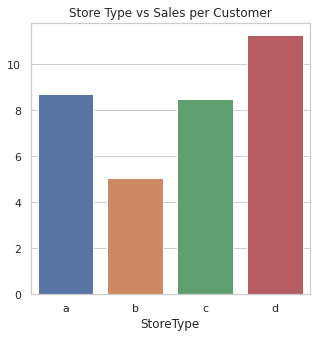

In [117]:
plt.rcParams["figure.figsize"] = (5,5)
#df.groupby('Month')['Promo'].sum().sum().plot(marker='d')
h = df.groupby('StoreType').agg({'Sales':'sum','Customers':'sum'}).reset_index()
sns.barplot(x=h.StoreType,y=h.Sales/h.Customers)
plt.title("Store Type vs Sales per Customer")

Text(0.5, 1.0, 'Store Type vs Sales per Store')

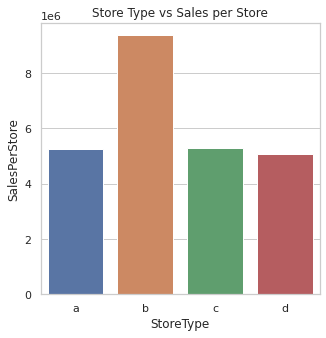

In [118]:
g = df.groupby(['StoreType','Store']).agg({'Sales':'sum'}).reset_index()
sales_per_store_per_store_type = {}
store_type = g['StoreType'].unique().tolist()

for st in store_type:
  sales_per_store_per_store_type[st] = sum(g[g['StoreType'] == st]['Sales'])/len(g[g['StoreType'] == st])
  
sales_per_store = pd.DataFrame(sales_per_store_per_store_type.items(), columns=['StoreType', 'SalesPerStore'])
sns.barplot(x=sales_per_store.StoreType,y=sales_per_store.SalesPerStore)
plt.title("Store Type vs Sales per Store")

B type store model is the most interesting store type because the sales per customer from that store type is the least among all the store types but the sales per store for B type store is the highest.

## **Section 8: Train Test Split and Modelling (Q8)**

In [102]:
from sklearn.preprocessing import LabelEncoder

In [103]:
# Preprocessing Steps:
#   1. One hot encoding of DayofWeek and StoreType
#   2. Filling CompetitionDistance Nan values with median
#   3. Filling CompetitioOpenSinceYear/Month with lowest value
#   4. Drop Columns Date,Store,PromoInterval,Promo, Customers and WeekOfYear
  
df_train = df.copy(deep=True)

df_train = df_train[df_train.Sales != 0]

one_hot = pd.get_dummies(df_train['DayOfWeek'])
df_train = df_train.drop('DayOfWeek',axis = 1)
df_train = df_train.join(one_hot)

one_hot = pd.get_dummies(df_train['StoreType'])
df_train = df_train.drop('StoreType',axis = 1)
df_train = df_train.join(one_hot)

label_encode = LabelEncoder()
df_train.Assortment = label_encode.fit_transform(df_train.Assortment)

df_train = df_train.drop(['Date','Store'], axis=1)
df_train.drop(columns=['Promo2SinceWeek',	'Promo2SinceYear','PromoInterval','Customers','WeekOfYear'], inplace=True)

df_train['CompetitionDistance'].fillna(df_train['CompetitionDistance'].median(), inplace=True)

df_train['CompetitionOpenSinceYear'].fillna(df_train['CompetitionOpenSinceYear'].min(), inplace=True)

df_train['CompetitionOpenSinceMonth'].fillna(df_train['CompetitionOpenSinceMonth'].min(), inplace=True)


In [104]:
df_train

,Sales,Open,Promo,StateHoliday,SchoolHoliday,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Year,Month,Day,1,2,3,4,5,6,7,a,b,c,d
0,5263,1,1,0,1,0,1270.0,9.0,2008.0,0,2015,7,31,0,0,0,0,1,0,0,0,0,1,0
1,5020,1,1,0,1,0,1270.0,9.0,2008.0,0,2015,7,30,0,0,0,1,0,0,0,0,0,1,0
2,4782,1,1,0,1,0,1270.0,9.0,2008.0,0,2015,7,29,0,0,1,0,0,0,0,0,0,1,0
3,5011,1,1,0,1,0,1270.0,9.0,2008.0,0,2015,7,28,0,1,0,0,0,0,0,0,0,1,0
4,6102,1,1,0,1,0,1270.0,9.0,2008.0,0,2015,7,27,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017202,6905,1,1,0,1,2,5350.0,1.0,1900.0,1,2013,1,7,1,0,0,0,0,0,0,0,0,0,1
1017204,4771,1,0,0,1,2,5350.0,1.0,1900.0,1,2013,1,5,0,0,0,0,0,1,0,0,0,0,1
1017205,4540,1,0,0,1,2,5350.0,1.0,1900.0,1,2013,1,4,0,0,0,0,1,0,0,0,0,0,1
1017206,4297,1,0,0,1,2,5350.0,1.0,1900.0,1,2013,1,3,0,0,0,1,0,0,0,0,0,0,1


In [105]:
X_test = df_train[(df_train.Year == 2015) & ((df_train.Month == 5) | (df_train.Month == 6) | (df_train.Month == 7))]
X_train = df_train[(df_train.Year != 2015) | ((df_train.Month != 5) & (df_train.Month != 6) & (df_train.Month != 7))]
print(X_train.shape[0], X_test.shape[0])

759848 84490


In [106]:
Y_train = X_train['Sales']
X_train = X_train.loc[:, X_train.columns != 'Sales']
Y_test = X_test['Sales']
X_test = X_test.loc[:, X_test.columns != 'Sales']

##XgBoost

In [18]:
!pip install ipython-autotime
%load_ext autotime

time: 115 µs (started: 2021-10-19 01:52:17 +00:00)


In [19]:
from xgboost import XGBRegressor

xgb = XGBRegressor(max_depth=20,n_jobs=4,n_estimators=150,subsample=0.7)
xgb_model = xgb.fit(X_train,Y_train)
xg_pred = xgb.predict(X_test)

[01:52:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
time: 11min 14s (started: 2021-10-19 01:52:17 +00:00)


In [23]:
#RMSPE
print(np.sqrt(np.mean(np.square(((Y_test - xg_pred) / Y_test)), axis=0)))

0.16529802174255592
time: 8.88 ms (started: 2021-10-19 02:03:35 +00:00)




1.   max_depth=20,n_jobs=4,n_estimators=300,subsample=0.7, training_time = 22 minutes RMSPE = 0.180995
2.   max_depth=25,n_jobs=8,n_estimators=200,subsample=0.7, training_time = 18 minutes RMSPE = 0.1695017
3.  max_depth=20,n_jobs=4,n_estimators=150,subsample=0.7, training_time = 11 minutes, RMSPE = 0.16529



In [24]:
import pickle
filename = 'xgb_model_2.sav'
pickle.dump(xgb_model, open(filename, 'wb'))

time: 2.25 s (started: 2021-10-19 02:04:15 +00:00)


For XgBoost i.e Extreme Gradient Boosting, the hyper parameters used are:
1. Max_depth: max_depth of tree 
2. n_jobs: Number of threads to run in parallel
3. n_estimators: Number of decision trees
4. Subsample : fraction of rows to be considered at random at each subsampling stage


I observed that that as I increased the number of n_estimators or max_depth, the RMSPE values increased hinting at likely overfitting of data. Although having subsampling of 0.7 reduced overfitting to some extent, the effect of high values of n_estimators and max_depth was more significant.

As I decreased the numbe rof estimators, the RMSPE value decreased and thus gave the best result on Kaggle as well. 

Different values of n_jobs were tried so as to speed up the model and I found that the model with higher n_jobs trained the model faster by around 2-3 minutes as compared to when the n_jobs value was low.

##Random Forest

In [17]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=350, max_depth=20)
random_forest = rf.fit(X_train,Y_train)
rf_pred = random_forest.predict(X_test)

In [25]:
#RMSPE
print(np.sqrt(np.mean(np.square(((Y_test - rf_pred) / Y_test)), axis=0)))

0.19923798247473815
time: 5.06 ms (started: 2021-10-19 02:04:21 +00:00)


In [26]:
import pickle
filename = 'rf_model_1.sav'
pickle.dump(random_forest, open(filename, 'wb'))

time: 56.8 s (started: 2021-10-19 02:04:52 +00:00)


1.   n_estimators = 400 , max_depth = 15,  training_time : 25 minutes, RMSPE = 0.36519
2.   n_estimators = 400, max_depth = 20, training_time : 28 minutes, RMSPE = 0.1990920
3.   n_estimators=350, max_depth=20, training_time : 22 minutes, RMSPE = 0.199237982






Hyperparameters for Random Forest
1. N_estimators: number of decision trees
2. Max_depth: max_depth of tree

I directly trained my model on a high value and got a relatively high RMSPE meaning that the model overfit the data i.e there was high variance but as I increased just the max_depth, the RMSPE decreased significantly indicating lower variance for the combination for max_depth and n_estimators and thus giving lower error. 

## **Section 9: t-test (Q9)**

In [107]:
from scipy.stats import ttest_ind
import pickle
xgb_model_pred = pickle.load(open('xgb_model_2.sav', 'rb'))
y_pred_xgb = xgb_model_pred.predict(X_test)

rf_pred = pickle.load(open('rf_model_1.sav', 'rb'))
y_pred_rf = rf_pred.predict(X_test)

scores = ttest_ind(y_pred_xgb,y_pred_rf)

[05:29:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [109]:
scores

Ttest_indResult(statistic=4.578813506800419, pvalue=4.679535880881244e-06)

T-Test is a test of checking whether the 2 sample means are significant or the the values are by chance. 

The t-stattistic value of 4.57 and the associated p-value of 4.67e-06 indicate that we can safely reject the null hypothesis that the 2 models are predicting similar values of sales. 

Basically the p-value is the probability of obtaining the t-stat in the t distribution assuming the null hypothesis.

Thus the lower pvalue for the associated t-stat provides us with enough evidence that the predictions made by XgBoost model are statistically different from that of the random forest.

## **Section 10: Screenshots (Q10)** 

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
dtypes = {'StateHoliday': str}
parse_dates = ['Date']
df_test = pd.read_csv('test.csv',dtype=dtypes,parse_dates=parse_dates)

In [14]:
df_test

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [15]:
df_new_test = pd.merge(df_test,df_store,on="Store").sort_values(by="Id")

In [16]:
df_new_test['Year'] = pd.DatetimeIndex(df_new_test['Date']).year
df_new_test['Month'] = pd.DatetimeIndex(df_new_test['Date']).month
df_new_test['Day'] = pd.DatetimeIndex(df_new_test['Date']).day

In [17]:
df_new_test

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,9,17
48,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,9,17
96,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN,2015,9,17
144,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN,2015,9,17
192,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN,2015,9,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40895,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2015,8,1
40943,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN,2015,8,1
40991,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN,2015,8,1
41039,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN,2015,8,1


In [18]:
df_new_test.loc[df_new_test['StateHoliday'] == '0', 'StateHoliday'] = 0
df_new_test.loc[df_new_test['StateHoliday'] == 'a', 'StateHoliday'] = 1 #Public Holiday
df_new_test.loc[df_new_test['StateHoliday'] == 'b', 'StateHoliday'] = 2 #Easter 
df_new_test.loc[df_new_test['StateHoliday'] == 'c', 'StateHoliday'] = 3 #Christmas

df_new_test['StateHoliday'] = df_new_test['StateHoliday'].astype(int)

In [19]:
df_new_test

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,9,17
48,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,9,17
96,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN,2015,9,17
144,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN,2015,9,17
192,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN,2015,9,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40895,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2015,8,1
40943,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN,2015,8,1
40991,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN,2015,8,1
41039,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN,2015,8,1


In [20]:
df_new_test.isna().sum()

Id                               0
Store                            0
DayOfWeek                        0
Date                             0
Open                            11
Promo                            0
StateHoliday                     0
SchoolHoliday                    0
StoreType                        0
Assortment                       0
CompetitionDistance             96
CompetitionOpenSinceMonth    15216
CompetitionOpenSinceYear     15216
Promo2                           0
Promo2SinceWeek              17232
Promo2SinceYear              17232
PromoInterval                17232
Year                             0
Month                            0
Day                              0
dtype: int64

In [21]:
#Cleaning and preprocessing test.csv
df_new_test.Open.fillna(df_new_test.Open.mode()[0],inplace=True)
df_new_test.CompetitionDistance.fillna(df_new_test.CompetitionDistance.median(),inplace=True)


one_hot = pd.get_dummies(df_new_test['DayOfWeek'])
df_new_test = df_new_test.drop('DayOfWeek',axis = 1)
df_new_test = df_new_test.join(one_hot)

one_hot = pd.get_dummies(df_new_test['StoreType'])
df_new_test = df_new_test.drop('StoreType',axis = 1)
df_new_test = df_new_test.join(one_hot)
 
label_encode = LabelEncoder()
df_new_test.Assortment = label_encode.fit_transform(df_new_test.Assortment)


df_new_test = df_new_test.drop(['Date','Store'], axis=1)
df_new_test.drop(columns=['Promo2SinceWeek',	'Promo2SinceYear','PromoInterval'], inplace=True)

df_new_test['CompetitionOpenSinceYear'].fillna(df_new_test['CompetitionOpenSinceYear'].min(), inplace=True)

df_new_test['CompetitionOpenSinceMonth'].fillna(df_new_test['CompetitionOpenSinceMonth'].min(), inplace=True)

In [22]:
df_new_test = df_new_test.drop('Id',axis=1)

In [23]:
df_new_test.isna().sum()


Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Year                         0
Month                        0
Day                          0
1                            0
2                            0
3                            0
4                            0
5                            0
6                            0
7                            0
a                            0
b                            0
c                            0
d                            0
dtype: int64

##XgBoost Submission

In [28]:
import pickle
xgb_model_pred = pickle.load(open('xgb_model_2.sav', 'rb'))
y_pred = xgb_model_pred.predict(df_new_test)
final_pred_df = pd.DataFrame()
final_pred_df['Id'] = df_test['Id']
final_pred_df['Sales'] = pd.Series(y_pred)

[02:23:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [29]:
print(final_pred_df)

          Id         Sales
0          1   3761.119385
1          2   7527.247559
2          3   8733.067383
3          4   7324.528320
4          5   6502.531738
...      ...           ...
41083  41084   3763.115967
41084  41085   9758.799805
41085  41086   8667.500977
41086  41087  29979.197266
41087  41088   9163.611328

[41088 rows x 2 columns]


In [30]:
final_pred_df.to_csv('sample_submission.csv' , sep =',',index=False)

In [31]:
!kaggle competitions submit -c rossmann-store-sales -f sample_submission.csv -m "XgBoost Model Original"

100% 610k/610k [00:00<00:00, 2.21MB/s]
Successfully submitted to Rossmann Store Sales

##Random Forest Submission

In [24]:
import pickle
rf_pred = pickle.load(open('rf_model_1.sav', 'rb'))
y_pred = rf_pred.predict(df_new_test)
final_pred_df = pd.DataFrame()
final_pred_df['Id'] = df_test['Id']
final_pred_df['Sales'] = pd.Series(y_pred)

In [25]:
print(final_pred_df)
final_pred_df.to_csv('sample_submission.csv' , sep =',',index=False)
!kaggle competitions submit -c rossmann-store-sales -f sample_submission.csv -m "Random Forest 2"

          Id         Sales
0          1   6470.742615
1          2   7844.077651
2          3   7979.680844
3          4   6546.696854
4          5   7006.990019
...      ...           ...
41083  41084   3175.824950
41084  41085   9069.749180
41085  41086   8283.808821
41086  41087  24885.786204
41087  41088   7572.130956

[41088 rows x 2 columns]
100% 956k/956k [00:01<00:00, 743kB/s]
Successfully submitted to Rossmann Store Sales

Public Score & Highest Rank: 
  Public Score: 0.17061

Private Score & Highest Rank: 
  Private Score: 0.16431

Kaggle profile link: https://www.kaggle.com/nileshrustagi

Screenshot(s):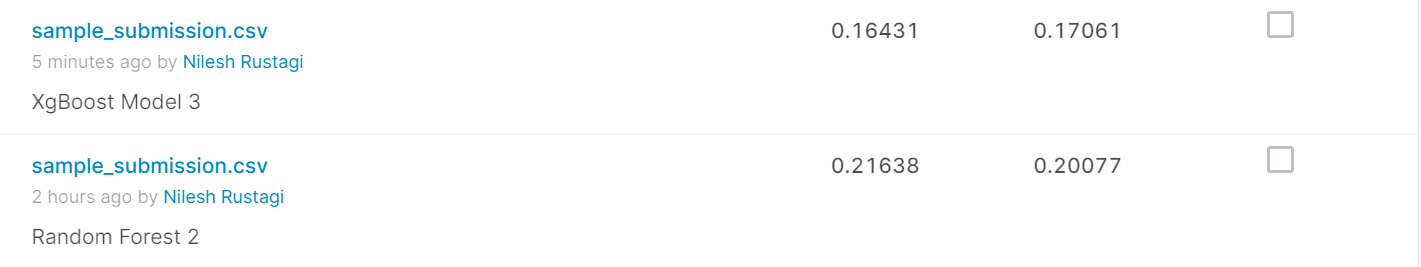